<a href="https://colab.research.google.com/github/mabittar/Portfolio/blob/master/Stock_Technical_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise Técnica de Ações

No mundo de investimento em ações há duas formas de analisar o valor de uma ação. A *análise fundamentalista* é aquela que estuda os fatores econômicos e a saúde financeira das empresas listadas na Bolsa.

Ela consegue projetar os resultados no longo e médio prazo e, assim, determinar um preço justo no momento presente para as ações, levando em consideração os aspectos macro e microeconômicos que impactam diretamente em seu desempenho na Bolsa.

Para isso, os analistas fundamentalistas analisam os fatores da economia no geral, como taxa de juros, inflação, decisões públicas; as informações do setor em que a empresa em análise atua; e, por fim, os aspectos qualitativos e quantitativos da organização, como balanços, receitas, lucros, administração, entre outros.

Há também **análise ténica**, que será o foco desse notebook. Esse tipo de análise consiste em analisar o preço da ação ao longo do tempo, que é imensamente facilitado se plotarmos um gráfico desse preço no tempo. 

Por meio dela é possível encontrar a tendência de um determinado papel baseando-se no volume, quantidade de ativos disponíveis para negociação na Bolsa, e na oferta, que são a quantidade de compradores interessados.

A análise técnica leva em conta que em qualquer instante de tempo, o movimento do preço é o resultado do desequilíbrio entre a demanda de compradores e a ofeta de vendedores.

Mas deixo o alerta que o preço de uma ação é caótico e mesmo com uma fórmula exata, com todo o recurso computacional disponível é impossivél prever o comportamento futuro de uma ação, pois o resultado de cada operação individual é aleatório. Assim como é impossível descrever o momento exato de cada gota de chuva ou rajada de vendo.
<center>
<img alt="Análise Técnica @Clear Corretora" width=75% src="https://blog.clear.com.br/wp-content/uploads/2018/08/analise-tecnica-e-fundamentalista.png"></center>

Mas então porque gastar tempo realizando um estudo técnico ou mesmo uma análise fundamentalista?

O preço de uma ação só possui dois comportamentos: tendência (alta ou baixa) e consolidação. Em consolidação o preço fica "encaixotado" em uma margem de preços até definir a direção em que voltará a seguir. Mas estará em tendência para cima ou para baixo até que as condições se alterem.

Também é possível utilizar a análise técnica e a análise fundamentalista de forma conjunta. Neste caso, os traders que já são adeptos a essa junção costumam optar pela análise fundamentalista para avaliar o desempenho das empresas listadas em bolsa e, depois de escolher quais ações investir, utilizam a análise técnica para encontrar o melhor momento para comprar as ações.

## 1. Como obter os dados relativos a uma ação da internet?

Existem diversas fontes de dados disponíveis para consulta na internet, inclusive algumas pagas. Mas nesse exemplo irei demonstrar as duas formas distintas.


1.   Usando o banco de dados do Yahoo Finance
2.   Usando a biblioteca Pandas do próprio Python

Na prática as duas consultam a mesma informação, porém com a biblioteca Pandas não é necessário acrescentar nada a mais, pois a mesma se responsabiliza em fazer a consulta diretamente.

Então vamos aos passos.



### 1.1 YFinance

YFinance busca resolver o hiáto deixado desde que o Yahoo!Finance deixou de fornecer os dados corretamente via API. A biblioteca é uma alternativa viável e um modo Pythonico para realizar o donwload dos dados financeiros histórios do Yahoo! Finance.

Mais sobre o assunto pode ser consultado diretamente na [documentação oficial](https://pypi.org/project/yfinance/).

In [146]:
# Utilizando o YFinance

!pip install yfinance &> /dev/null

# parte do comando anterior &> /dev/null é apenas para silenciar a saída dessa célula

In [147]:
# importando as bibliotecas necessárias
import pandas as pd
import yfinance as yf

In [148]:
# definindo uma lista de ativos (tickers) para consulta
tickers = ["^BVSP", "PETR4.SA", "WEGE3.SA", "FB", "ACN"]

Nesse caso a lista definida foi:


*   ^BVSP = Índice Bovespa
*   PETR4.SA = Ações preferenciais Petrobras negociadas na Bolsa Brasil
*   WEGE3.SA = Ações ordinárias WEG negociadas na Bolsa Brasil
*   FB = Ações Facebook negociadas na Bolsa de Tecnologia Americana NASDAQ
*   ACN = Ações Accenture negociadas na Bolsa Americana

Agora que definimos os ativos que estamos buscando os preços iremos realizar o donwload das informações.

In [149]:
# importando os dados utilizando YFinance
df = yf.download(tickers, start="2016-01-01", end="2020-12-30", period="1d")

#nessa etapa definimos a lista de ativos, uma data de início e fim, assim como o período de 1d para os dados

[*********************100%***********************]  5 of 5 completed


In [150]:
#vamos verificar como ficou nosso dataframe
df.head()

Adj Close                        ...      Volume                      
                  ACN          FB  PETR4.SA  ...    PETR4.SA   WEGE3.SA      ^BVSP
Date                                         ...                                  
2016-01-04  93.409027  102.220001  6.373318  ...  45962100.0  3939390.0  2976300.0
2016-01-05  93.895187  102.730003  6.197053  ...  29446700.0  3664830.0  2557200.0
2016-01-06  93.711723  102.970001  5.937296  ...  67507200.0  3274830.0  3935900.0
2016-01-07  90.959824   97.919998  5.807419  ...  57387900.0  3008850.0  4032300.0
2016-01-08  90.079201   97.330002  5.816695  ...  52100300.0  2525250.0  3221600.0

[5 rows x 30 columns]

É possível observar na primeira coluna a data correspondente aos valores nas colunas. Essa coluna também é o index do dataframe.
Também é possível observar que nossas colunas possuem duas subdivisões: Uma com dados e uma subcoluna para o nome de cada ativo que especificamos na lista `tickers`.

Em relação as colunas ou variáveis podemos ver:

*   Adj Price = Preço de ajuste (vale lembrar que as ações distribuem dividendos ao longo do tempo, então o preço com ajuste corrige essa diferença no valor da ação)
*   Close = Preço de Fechamento
*   High = Preço máximo alcançado no intraperíodo
*   Low = Menor Preço alcançado no intraperíodo
*   Open = Preço de Abertura
*   Volume = Volume de negociós no período


Entretanto essas subcolunas podem acabar complicando na hora das análises, a bilbioteca oferece uma possibilidade para solucionarmos essa questão, veja como:

In [151]:
# dados agrupados por ativo
df_groupby = yf.download(tickers, start="2016-01-01", end="2020-12-30", period="1d", group_by="Ticker" )

#no último argumento passamos o group_by, assim iremos agrupar as informações por ativo

[*********************100%***********************]  5 of 5 completed


In [152]:
df_groupby.head()

ACN              ...          FB            
                  Open        High  ...   Adj Close      Volume
Date                                ...                        
2016-01-04  102.620003  102.650002  ...  102.220001  37912400.0
2016-01-05  101.970001  102.870003  ...  102.730003  23258200.0
2016-01-06  100.809998  103.059998  ...  102.970001  25096200.0
2016-01-07   99.750000  100.839996  ...   97.919998  45172900.0
2016-01-08   99.480003   99.809998  ...   97.330002  35402300.0

[5 rows x 30 columns]

Podemos ainda verificar a % de variação do preço no período

In [153]:
df_pct = df['Adj Close'].pct_change()

In [154]:
df_pct.head()

,ACN,FB,PETR4.SA,WEGE3.SA,^BVSP
Date,,,,,
2016-01-04,NaN,NaN,NaN,NaN,NaN
2016-01-05,0.005205,0.004989,-0.027657,0.048502,0.006597
2016-01-06,-0.001954,0.002336,-0.041916,-0.022799,-0.015229
2016-01-07,-0.029366,-0.049043,-0.021875,-0.028669,-0.025806
2016-01-08,-0.009681,-0.006025,0.001597,-0.004809,-0.002040


In [155]:
# Não há dados suficientes para calcular a varição na primeira linha, vamos excluí-lá
df_pct.dropna(axis=0, inplace = True)
df_pct

,ACN,FB,PETR4.SA,WEGE3.SA,^BVSP
Date,,,,,
2016-01-05,0.005205,0.004989,-0.027657,0.048502,0.006597
2016-01-06,-0.001954,0.002336,-0.041916,-0.022799,-0.015229
2016-01-07,-0.029366,-0.049043,-0.021875,-0.028669,-0.025806
2016-01-08,-0.009681,-0.006025,0.001597,-0.004809,-0.002040
2016-01-11,0.010489,0.001849,-0.028708,-0.022755,-0.016301
...,...,...,...,...,...
2020-12-22,-0.007459,-0.020895,0.009623,0.011248,0.002862
2020-12-23,-0.007824,0.003819,0.024560,-0.002746,0.012970
2020-12-24,-0.000544,-0.002648,0.000000,0.000000,0.000000


### 1.2 Pandas

Funções do pandas.DataReader extraem dados de várias fontes da internet diretamente para um DataFrame do Pandas.

Para outras informações consulte a [documentação oficial](https://pydata.github.io/pandas-datareader/remote_data.html).

In [156]:
# importando bilbiotecas necessárias

from pandas_datareader import data
import pandas as pd
import numpy as np

In [157]:
df_pd = pd.DataFrame()

for ticker in tickers:
  df_pd[ticker] = data.DataReader(ticker, data_source= 'yahoo', start= '2016-01-01', end='2020-12-30')['Adj Close']

In [158]:
df_pd

,^BVSP,PETR4.SA,WEGE3.SA,FB,ACN
Date,,,,,
2016-01-04,42141.0,6.373318,10.236556,102.220001,93.409027
2016-01-05,42419.0,6.197053,10.733047,102.730003,93.895187
2016-01-06,41773.0,5.937296,10.488346,102.970001,93.711723
2016-01-07,40695.0,5.807419,10.187654,97.919998,90.959824
2016-01-08,40612.0,5.816695,10.138658,97.330002,90.079201
...,...,...,...,...,...
2020-12-22,116348.0,27.280001,72.820000,267.089996,259.470001
2020-12-23,117857.0,27.950001,72.620003,268.109985,257.440002
2020-12-28,119051.0,28.180000,75.500000,277.000000,259.679993


### Comparação dos dados

Utilizando a funçao `equals` do pandas podemos consultar se os dois dataframes gerados são identicos.

In [159]:
df['Adj Close'].equals(df_pd)

False

Mas a fonte de dados não é a mesma? Não deveriam ser iguais?

A biblioteca YFinance puxa todos os dados disponíveis, inclusive quando não houve operações no mercado (principalmente devido a feriados) enquanto a função do Pandas retorna somente dados onde houve operações nos dois mercados.

Podemos verificar essas diferenças consultando os valores ausentes por coluna.

In [160]:
(df['Adj Close'].isnull().sum() / df.shape[0]).sort_values(ascending=False)

^BVSP       0.044186
WEGE3.SA    0.037984
PETR4.SA    0.037984
FB          0.025581
ACN         0.025581
dtype: float64

In [161]:
(df_pd.isnull().sum() / df_pd.shape[0]).sort_values(ascending=False)

ACN         0.025932
FB          0.025932
WEGE3.SA    0.000000
PETR4.SA    0.000000
^BVSP       0.000000
dtype: float64

In [162]:
print("YFinance - Total de Entradas: ",df.shape[0])
print("Pandas - Total de Entradas: ",df_pd.shape[0])

YFinance - Total de Entradas:  1290
Pandas - Total de Entradas:  1234


Podemos observar que a biblioteca Pandas não fez o donwload de dados ausentes para o Índice Bovespa e para ações que compõe o índice (WEGE E PETR), enquanto a biblioteca YFinance retornou aproximadamente 4% de valores ausentes.

Para as ações do mercado americano (Facebook e Accenture) as duas opções retornaram praticamente a mesma porcentagem de valores ausentes.

Podemos ainda obsevar na contagem de entradas que o YFinance retorna 1.290 linhas enquanto o Pandas retorna 1.234 ou 56 entradas a menos.

Entretanto como se trata de valores ausentes essa diferença não irá alterar as análises futuras.

## Análise Técnica

Bom já temos a nossa base de dados e agora podemos realizar algumas observações.

### Topos e Fundos

Com a base de dados fica fácil obter topos e fundos dos dados

In [163]:
print("Data onde os maiores valores foram verificados: \n")
df_pd['PETR4.SA'].nlargest(5, keep='first')

Data onde os maiores valores foram verificados: 



Date
2020-01-06    30.807720
2020-01-02    30.697731
2020-01-07    30.687731
2020-02-19    30.547739
2019-12-12    30.544981
Name: PETR4.SA, dtype: float64

In [164]:
print("Data onde os menores valores foram verificados: \n")
df_pd['PETR4.SA'].nsmallest(5, keep='first')

Data onde os menores valores foram verificados: 



Date
2016-01-26    3.896351
2016-02-11    3.924182
2016-02-02    3.989122
2016-02-10    3.998398
2016-01-22    4.091169
Name: PETR4.SA, dtype: float64

### Plotando Gráficos



#### Gráfico de Linha

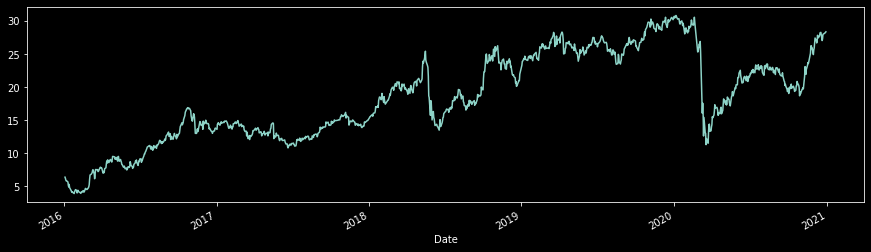

In [165]:
#importando a biblioteca matplot
import matplotlib.pyplot as plt

# instânciando objeto gráfico
fig = plt.figure(figsize=(15,4))
df_pd['PETR4.SA'].plot()

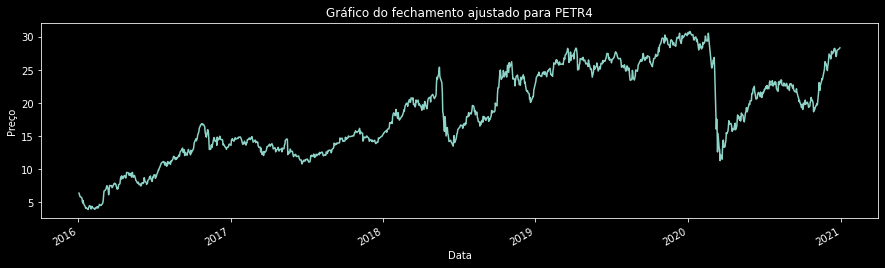

In [166]:
# mas podemos melhorar um pouco mais o gráfico

# instânciando objeto gráfico
fig = plt.figure(figsize=(15,4))
df_pd['PETR4.SA'].plot()

# definindo legenda
plt.xlabel("Data")
plt.ylabel("Preço")
# definindo o título
plt.title("Gráfico do fechamento ajustado para PETR4")

# adicionando cor de fundo
plt.style.use('dark_background')
# plotando o gráfico customizado
plt.show()

Observe que o preço de uma ação não varia de forma linear, mas sim fazendo zig-zag para cima ou para baixo.

#### Gráfico de Candle Stick

Cada candle é formado por quatro pontos relativos à um  período em análise (no nosso caso 1 dia): o preço de abertura, de fechamento, a máxima e a mínima.

Veja mais sobre o assunto no site [Bússola do Investidor](https://www.bussoladoinvestidor.com.br/grafico-de-candlestick/?utm_source=abc).

Para plotarmos o gráfico de candlestick iremos solicitar os dados para os 4 pontos (open, close, high e low) para a ação PETR4.SA

In [167]:
df_petr = pd.DataFrame()
df_petr = data.DataReader('PETR4.SA', data_source= 'yahoo', start= '2003-01-01', end='2020-12-30')

In [168]:
df_petr

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2003-01-02,5.975000,5.818750,5.820000,5.887500,9900800.0,4.058720
2003-01-03,5.987500,5.848750,5.920000,5.862500,11356800.0,4.041486
2003-01-06,6.175000,5.912500,5.975000,6.137500,45209600.0,4.231064
2003-01-07,6.098750,5.937500,6.062500,5.997500,34985600.0,4.134552
2003-01-08,6.068750,5.975000,6.037500,6.025000,18156800.0,4.153510
...,...,...,...,...,...,...
2020-12-22,27.469999,27.049999,27.200001,27.280001,46513200.0,27.280001
2020-12-23,28.250000,27.350000,27.430000,27.950001,49038900.0,27.950001
2020-12-28,28.520000,28.180000,28.360001,28.180000,36313300.0,28.180000


Vamos verificar se há algum valor ausente no dataset para tratamento

In [169]:
df_petr.isna().sum()

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

Como não há valores ausentes iremos plotar os gráficos adiante:

In [170]:
# importando bibliotecas necessárias
import plotly.graph_objects as go
from functools import reduce

# gerandos os dados
datas = df_petr.index

#definindo os pontos max, min, abertura e fechamento
trace1 = {
    'x' : datas,
    'open': df_petr.Open,
    'close': df_petr.Close,
    'high': df_petr.High,
    'low': df_petr.Low,
    'type': 'candlestick',
    'name': 'PETR4',
    'showlegend': False,

}


# definindo objetos do gráfico
plot = [trace1]

# Configurando Layout
layout = go.Layout({
    'title': "Gráfico de Candlestick para PETR4",
    'font': { 'size' : 15},
    'xaxis_rangeslider_visible': False #remover a barra de intervalo horizontal,
})

# chamando todos os objetos definidos
fig = go.Figure(data=plot, layout=layout)

# acrescentando informações ao gráfico
fig.add_shape(x0='2020-02-20', x1='2020-02-20', y0=0, y1=1, xref='x', yref='paper',
        line_width=2)
fig.add_annotation(x='2020-02-20', y=0.05, xref='x', yref='paper',
            text="Inicio Pandemia Covid-19",
            showarrow=False,
            xanchor='left')

fig.show()

Muito bem agora com as informações em um gráfico, onde o eixo x representa a passagem do tempo e o eixo y representa a variação do valor do ativo (máx, mín, abertura e fechamento) fica mais fácil observar como o preço de um ativo se comporta.


Novamente observe que o preço não se movimenta em linha reta, mas em constantes zig-zag. 

#### Médias Móveis Aritiméticas - SMA (Simple Moving Average)

Lembre-se que no início desse notebook conversamos que o preço possui apenas dois comportamentos: consolidação e tendência. É possível facilitar a observação desses comportamentos com o auxílio de médias móveis.



In [171]:
#primeiramente usando médias aritiméticas
avg_17 = df_petr.Close.rolling(window=17, min_periods=17).mean()
avg_34 = df_petr.Close.rolling(window=34, min_periods=34).mean()
avg_72 = df_petr.Close.rolling(window=72, min_periods=72).mean()

#definindo os pontos max, min, abertura e fechamento
trace1 = {
    'x' : datas,
    'open': df_petr.Open,
    'close': df_petr.Close,
    'high': df_petr.High,
    'low': df_petr.Low,
    'type': 'candlestick',
    'name': 'PETR4',
    'showlegend': False,

}

# avarge for 17 days (line)
trace2 = {
    'x': datas,
    'y': avg_17,
    'type': 'scatter',
    'mode': 'lines',
    'line': {
        'width': 1,
        'color': 'purple'
    },
    'name': 'SMA 17'
}

# avarge for 34 days (line)
trace3 = {
    'x': datas,
    'y': avg_34,
    'type': 'scatter',
    'mode': 'lines',
    'line': {
        'width': 1,
        'color': 'blue'
    },
    'name': 'SMA 34'
}

# avarge for 72 days (line)
trace4 = {
    'x': datas,
    'y': avg_72,
    'type': 'scatter',
    'mode': 'lines',
    'line': {
        'width': 1,
        'color': 'orange'
    },
    'name': 'SMA 72'
}

# definindo objetos do gráfico
plot = [trace1, trace2, trace3, trace4]

# Configurando Layout
layout = go.Layout({
    'title': "Gráfico de Candlestick para PETR4 e Médias Móveis Aritiméticas",
    'font': { 'size' : 15}
})

# chamando todos os objetos definidos
fig = go.Figure(data=plot, layout=layout)
fig.show()

A linha roxa representa uma média rápida (17 períodos), já a linha laranja representa uma média lenta (72 períodos) e a linha azul é a intermediária (34 períodos).

Do gráfico anterior podemos observar que quando a linha roxa está acima da linha azul e ambas estão a cima da linha laranja o preço está em pura tendência de alta. Quando a linha roxa está a baixo da linha azul e ambas linhas estão a baixo da linha laranja o preço está em pura tendência de baixa. Quando a ordem das linhas está mistrurada representa o momento de consolidação do preço, até que seja definida uma nova tendência.

Observe também que enquanto as linhas estão alinhadas para cima, o candlestick busca uma das linhas e volta a se mover na direção do alinhamento (para cima), até o um momento que essa tendência acaba.

#### Médias Móveis Exponenciais - EMA (Exponential Moving Average)

A média móvel exponencial é um método amplamente usado para filtrar ruídos e identificar tendências. O peso de cada elemento diminui progressivamente ao longo do tempo, o que significa que a média móvel exponencial dá maior peso aos pontos de dados recentes. Isso é feito sob a ideia de que dados recentes são mais relevantes do que dados antigos. Em comparação com a média móvel simples, a média móvel exponencial reage mais rápido às mudanças, pois é mais sensível aos movimentos recentes.

Novamente iremos utilizar os 3 períodos do gráfico anterior 17, 34, e 72 períodos(que para a nossa amostra de dados são dias)

In [172]:
# primeiramente definindo as médias exponenciais
avg_17 = df_petr.Close.ewm(span=17, min_periods=17).mean()
avg_34 = df_petr.Close.ewm(span=34, min_periods=34).mean()
avg_72 = df_petr.Close.ewm(span=72, min_periods=72).mean()

#definindo os pontos max, min, abertura e fechamento
trace1 = {
    'x' : datas,
    'open': df_petr.Open,
    'close': df_petr.Close,
    'high': df_petr.High,
    'low': df_petr.Low,
    'type': 'candlestick',
    'name': 'PETR4',
    'showlegend': False,

}

# avarge for 17 days (line)
trace2 = {
    'x': datas,
    'y': avg_17,
    'type': 'scatter',
    'mode': 'lines',
    'line': {
        'width': 1,
        'color': 'purple'
    },
    'name': 'EMA 17'
}

# avarge for 34 days (line)
trace3 = {
    'x': datas,
    'y': avg_34,
    'type': 'scatter',
    'mode': 'lines',
    'line': {
        'width': 1,
        'color': 'blue'
    },
    'name': 'EMA 34'
}

# avarge for 72 days (line)
trace4 = {
    'x': datas,
    'y': avg_72,
    'type': 'scatter',
    'mode': 'lines',
    'line': {
        'width': 1,
        'color': 'orange'
    },
    'name': 'EMA 72'
}

# definindo objetos do gráfico
plot = [trace1, trace2, trace3, trace4]

# Configurando Layout
layout = go.Layout({
    'title': "Gráfico de Candlestick para PETR4 e Médias Móveis Exponeciais",
    'font': { 'size' : 15}
})

# chamando todos os objetos definidos
fig = go.Figure(data=plot, layout=layout)
fig.show()

Caso você queira apronfundar ainda mais no estudo sobre médias móveis, recomendo esse ótimo [post](https://towardsdatascience.com/moving-averages-in-python-16170e20f6c) feito pela Amanda Moreno.

#### Inserindo máximo e mínimo

Quando começamos nossas observações o primeiro questionamento foi o preço máximo e o preço mínimo do ativo dentro do período de observação.

Será que conseguimos inserí-los no gráfico como uma linha delimitando essas fronteiras?

In [173]:
# obtendo os valores máximos e mínimos
preco_max = df_petr['Close'].max()
data_max = df_petr['Close'].idxmax().date().strftime('%Y-%m-%d')
preco_min = df_petr['Close'].min()
data_min = df_petr['Close'].idxmin().date().strftime('%Y-%m-%d')
data_ultima = df_petr.index[-1].date().strftime('%Y-%m-%d')

In [174]:
# apenas para checar o valor atribuído a variável
data_ultima

'2020-12-30'

Agora que atribuimos as informações necessárias, vamos acrescentá-las ao gráfico, de forma que possamos também visualizá-las.

In [175]:
#definindo os pontos max, min, abertura e fechamento
trace1 = {
    'x' : datas,
    'open': df_petr.Open,
    'close': df_petr.Close,
    'high': df_petr.High,
    'low': df_petr.Low,
    'type': 'candlestick',
    'name': 'PETR4',
    'showlegend': False,

}

# avarge for 17 days (line)
trace2 = {
    'x': datas,
    'y': avg_17,
    'type': 'scatter',
    'mode': 'lines',
    'line': {
        'width': 1,
        'color': 'purple'
    },
    'name': 'EMA 17'
}

# avarge for 34 days (line)
trace3 = {
    'x': datas,
    'y': avg_34,
    'type': 'scatter',
    'mode': 'lines',
    'line': {
        'width': 1,
        'color': 'blue'
    },
    'name': 'EMA 34'
}

# avarge for 72 days (line)
trace4 = {
    'x': datas,
    'y': avg_72,
    'type': 'scatter',
    'mode': 'lines',
    'line': {
        'width': 1,
        'color': 'orange'
    },
    'name': 'EMA 72'
}

# definindo objetos do gráfico
plot = [trace1, trace2, trace3, trace4]

# Configurando Layout
layout = go.Layout({
    'title': "Gráfico de Candlestick para PETR4 e Médias Móveis Exponeciais",
    'font': { 'size' : 15}
})

# chamando todos os objetos definidos
fig = go.Figure(data=plot, layout=layout)

#adicionando linha para preço maximo
fig.add_shape(type='line',
                x0=data_max,
                y0=preco_max,
                x1=data_ultima,
                y1=preco_max,
                line=dict(color='darkgreen',),
                xref='x',
                yref='y'
)
#adicionando linha para preço minimo
fig.add_shape(type='line',
                x0=data_min,
                y0=preco_min,
                x1=data_ultima,
                y1=preco_min,
                line=dict(color='darkred',),
                xref='x',
                yref='y'
)

fig.show()

### Estratégias de Operações

Vimos como podemos facilmente obter os preços históricos de uma ação em determinado período. Observamos também algumas informações importantes, como topos e fundos dos preços no período que estamos analisando. 
Na seção anteior passamos pelos gráficos dessas informações e como acrescentar infomações adicionais no gráfico (médias móveis, topos e fundos e datas importantes).

O próximo passo é utilizarmos os recursos computacionais para algumas estratégias de operações. Lembrando sempre que prever o preço futuro de uma ação é como tentar prever onde o próximo pingo d'água em uma tempestade vai cair.

A intenção aqui é demonstrar que é possível eliminar a ação humana quando temos um setup (modelo de operações) definido.

#### Medias Móveis alinhas para cima

Quando as médias móveis estiverem alinhadas para cima e o preço da ação tocar na media móvel 17 irá executar uma compra.
Lembrando:

* AVG_17 = média móvel exponencial para 17 períodos
* AVG_34 = média móvel exponencial para 34 períodos
* AVG_72 = média móvel exponencial para 72 períodos

Para facilitar nossa análise iremos inserir uma coluna para cada média móvel exponencial e também uma coluna para a variação percentual do preço de fechamento.

In [176]:
df_petr['avg_17'] = df_petr.Close.ewm(span=17, min_periods=17).mean()
df_petr['avg_34'] = df_petr.Close.ewm(span=34, min_periods=34).mean()
df_petr['avg_72'] = df_petr.Close.ewm(span=72, min_periods=72).mean()
df_petr['variacao'] = df_petr.Close.pct_change()

Agora iremos fazer a verificação se a MM (média móvel) 17 é maior que a 34,se a 17 é maior que a 72 e se a 34 é maior que a 72, caso essa informação seja verdadeira, sigonifica que elas estão alinhadas para cima. Para essa verificação será acrescida uma coluna `alinhada_cima` caso a condição seja verdadeira (True) ou Falsa (False).

In [177]:
df_petr['alinhada_cima'] =  (df_petr['avg_17'] > df_petr['avg_34']) & (df_petr['avg_17'] > df_petr['avg_72']) & (df_petr['avg_34'] > df_petr['avg_72'])

Agora vamos impor a condição que quando o preço do ativo tocar (seja igual)a MM17 iremos executar a compra até que ele toque novamente a linha.

In [178]:
df_petr['Setup1'] = ((df_petr['High'] > df_petr['avg_17']) & (df_petr['Low'] < df_petr['avg_17'])) & (df_petr['alinhada_cima'] == True)

Como estamos utilizando a média móvel com 72 períodos podemos excluir as linhas que não possuem essa avaliação.

In [179]:
df_petr.dropna(axis=0, inplace=True)

In [180]:
#verificando o dataset
df_petr

,High,Low,Open,Close,Volume,Adj Close,avg_17,avg_34,avg_72,variacao,alinhada_cima,Setup1
Date,,,,,,,,,,,,
2003-04-15,5.851250,5.730000,5.807500,5.850000,21129600.0,4.032869,5.857354,5.831119,5.823347,0.010799,True,False
2003-04-16,5.900000,5.787500,5.862500,5.787500,39923200.0,3.989783,5.849591,5.828592,5.822216,-0.010684,True,True
2003-04-17,5.967500,5.848750,5.875000,5.937500,26972800.0,4.093189,5.859360,5.834896,5.825838,0.025918,True,True
2003-04-22,6.025000,5.868750,5.875000,6.025000,39888000.0,4.153510,5.877767,5.845892,5.832070,0.014737,True,True
2003-04-23,6.100000,5.927500,6.000000,6.082500,38883200.0,4.193150,5.900518,5.859569,5.839877,0.009544,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-22,27.469999,27.049999,27.200001,27.280001,46513200.0,27.280001,26.922228,25.524633,23.849248,0.009623,True,False
2020-12-23,28.250000,27.350000,27.430000,27.950001,49038900.0,27.950001,27.036425,25.663226,23.961597,0.024560,True,False
2020-12-28,28.520000,28.180000,28.360001,28.180000,36313300.0,28.180000,27.163489,25.807041,24.077170,0.008229,True,False


In [181]:
df_petr.Setup1.value_counts()

False    3772
True      576
Name: Setup1, dtype: int64

Com a contagem de valores podemos obsevar que passamos 241 dias em posse do ativo.

#### Perfomance do algorítmo

Agora  vamos calcular se fossemos seguir essa estratégia como teríamos saido ao longo do tempo, durante o período de avaliação.

Como entrada para o nosso algorítmo iniciaremos com um capital de R$1000 e toda vez que a estratégia for True irá comprar o ativo. Quando a variável `Setup1` for False irá vender.

In [182]:
df_petr['estrategia1'] = 1000*(1+df_petr['Setup1'].shift(1)*df_petr['variacao']).cumprod()
df_petr

,High,Low,Open,Close,Volume,Adj Close,avg_17,avg_34,avg_72,variacao,alinhada_cima,Setup1,estrategia1
Date,,,,,,,,,,,,,
2003-04-15,5.851250,5.730000,5.807500,5.850000,21129600.0,4.032869,5.857354,5.831119,5.823347,0.010799,True,False,NaN
2003-04-16,5.900000,5.787500,5.862500,5.787500,39923200.0,3.989783,5.849591,5.828592,5.822216,-0.010684,True,True,1000
2003-04-17,5.967500,5.848750,5.875000,5.937500,26972800.0,4.093189,5.859360,5.834896,5.825838,0.025918,True,True,1025.92
2003-04-22,6.025000,5.868750,5.875000,6.025000,39888000.0,4.153510,5.877767,5.845892,5.832070,0.014737,True,True,1041.04
2003-04-23,6.100000,5.927500,6.000000,6.082500,38883200.0,4.193150,5.900518,5.859569,5.839877,0.009544,True,False,1050.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-22,27.469999,27.049999,27.200001,27.280001,46513200.0,27.280001,26.922228,25.524633,23.849248,0.009623,True,False,563.337
2020-12-23,28.250000,27.350000,27.430000,27.950001,49038900.0,27.950001,27.036425,25.663226,23.961597,0.024560,True,False,563.337
2020-12-28,28.520000,28.180000,28.360001,28.180000,36313300.0,28.180000,27.163489,25.807041,24.077170,0.008229,True,False,563.337


In [183]:
df_petr['estrategia1'].describe()

count     4347.00000
unique     570.00000
top       1020.09641
freq       209.00000
Name: estrategia1, dtype: float64

Pelo visto nosso Setup não se saiu bem ao longo do tempo, vamos plotar um gráfico simples para  verificar o desempenho

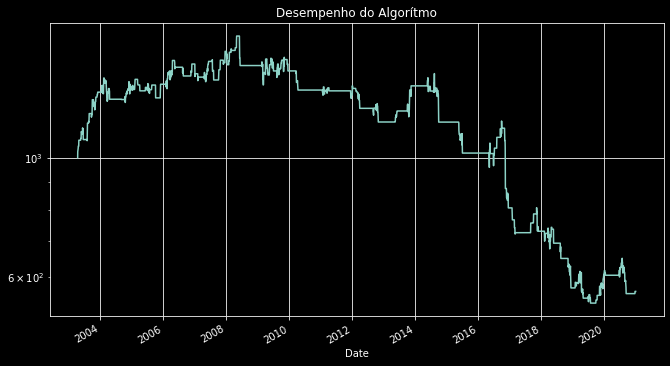

In [184]:
graph = df_petr['estrategia1'].plot(grid=True, kind='line', title ="Desempenho do Algorítmo", logy=True, figsize=(11, 6))

Podemos observar que a princípio começamos bem entretando com o passar dos anos fomos perdendo inclusive nosso valor principal.

#### Cálculo do retorno no período

Primeiramente vamos calcular a diferença de anos entre a primeira avaliação e a última

In [185]:
from dateutil.relativedelta import relativedelta

data_inicio = df_petr.index[0]
data_ultima = df_petr.index[-1]

anos = relativedelta(data_ultima, data_inicio).years

In [186]:
anos

17